# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing Files

In [2]:
df_daily = pd.read_csv("daily_activity.csv")
df_hourly = pd.read_csv("hourly_data.csv")
df_sleep = pd.read_csv("sleep_day.csv")

In [4]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [9]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   Calories          22099 non-null  int64  
 3   TotalIntensity    22099 non-null  int64  
 4   AverageIntensity  22099 non-null  float64
 5   StepTotal         22099 non-null  int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 1.0+ MB


In [10]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      413 non-null    int64 
 1   SleepDay                413 non-null    object
 2   TotalSleepRecords       413 non-null    int64 
 3   TotalMinutesAsleep      413 non-null    int64 
 4   TotalTimeInBed          413 non-null    int64 
 5   TotalMinutesAwakeInBed  413 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 19.5+ KB


# Cleaning Data

## daily_activity Dataset

### Removing 3 Columns

In [6]:
df_daily = df_daily.drop(columns=['TrackerDistance', 'LoggedActivitiesDistance', 'SedentaryActiveDistance'])

### Changing Date Format

In [8]:
df_daily['ActivityDate'] = pd.to_datetime(df_daily['ActivityDate'])

## hourly_data Dataset

### Changing Date Format

In [11]:
df_hourly['ActivityHour'] = pd.to_datetime(df_hourly['ActivityHour'])

### Changing StepTotal Column Name

In [68]:
df_hourly = df_hourly.rename(columns={'StepTotal': 'TotalSteps'})

## sleep_day Dataset

### Changing Date Format

In [12]:
df_sleep['SleepDay'] = pd.to_datetime(df_sleep['SleepDay'])

# Exploring Datasets

## daily_activity Dataset

In [15]:
df_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   VeryActiveDistance        940 non-null    float64       
 5   ModeratelyActiveDistance  940 non-null    float64       
 6   LightActiveDistance       940 non-null    float64       
 7   VeryActiveMinutes         940 non-null    int64         
 8   FairlyActiveMinutes       940 non-null    int64         
 9   LightlyActiveMinutes      940 non-null    int64         
 10  SedentaryMinutes          940 non-null    int64         
 11  Calories                  940 non-null    int64         
dtypes: datetime64[ns](1), 

In [13]:
df_daily.head()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,2016-04-12,13162,8.50,1.88,0.55,6.06,25,13,328,728,1985
1,1503960366,2016-04-13,10735,6.97,1.57,0.69,4.71,21,19,217,776,1797
2,1503960366,2016-04-14,10460,6.74,2.44,0.40,3.91,30,11,181,1218,1776
3,1503960366,2016-04-15,9762,6.28,2.14,1.26,2.83,29,34,209,726,1745
4,1503960366,2016-04-16,12669,8.16,2.71,0.41,5.04,36,10,221,773,1863


In [14]:
df_daily.Id.nunique()

33

In [17]:
df_daily.Id.value_counts()

Id
1503960366    31
1624580081    31
1844505072    31
1927972279    31
2022484408    31
2320127002    31
2026352035    31
4020332650    31
2873212765    31
4445114986    31
4319703577    31
4388161847    31
8378563200    31
6962181067    31
5553957443    31
4702921684    31
4558609924    31
8877689391    31
8583815059    31
8053475328    31
7086361926    31
1644430081    30
5577150313    30
3977333714    30
6290855005    29
8792009665    29
6117666160    28
7007744171    26
6775888955    26
3372868164    20
8253242879    19
2347167796    18
4057192912     4
Name: count, dtype: int64

In [19]:
df_daily.ActivityDate.nunique()

31

In [59]:
df_daily.ActivityDate.value_counts()

ActivityDate
2016-04-12    33
2016-04-13    33
2016-04-14    33
2016-04-15    33
2016-04-16    32
2016-04-17    32
2016-04-18    32
2016-04-19    32
2016-04-20    32
2016-04-21    32
2016-04-22    32
2016-04-23    32
2016-04-24    32
2016-04-25    32
2016-04-26    32
2016-04-27    32
2016-04-28    32
2016-04-29    32
2016-04-30    31
2016-05-01    30
2016-05-02    29
2016-05-03    29
2016-05-04    29
2016-05-05    29
2016-05-06    29
2016-05-07    29
2016-05-08    27
2016-05-09    27
2016-05-10    26
2016-05-11    24
2016-05-12    21
Name: count, dtype: int64

In [20]:
df_daily.describe()

,Id,ActivityDate,TotalSteps,TotalDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,2016-04-26 06:53:37.021276672,7637.910638,5.489702,1.502681,0.567543,3.340819,21.164894,13.564894,192.812766,991.210638,2303.609574
min,1.503960e+09,2016-04-12 00:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-19 00:00:00,3789.750000,2.620000,0.000000,0.000000,1.945000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,2016-04-26 00:00:00,7405.500000,5.245000,0.210000,0.240000,3.365000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,2016-05-04 00:00:00,10727.000000,7.712500,2.052500,0.800000,4.782500,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,2016-05-12 00:00:00,36019.000000,28.030001,21.920000,6.480000,10.710000,210.000000,143.000000,518.000000,1440.000000,4900.000000
std,2.424805e+09,NaN,5087.150742,3.924606,2.658941,0.883580,2.040655,32.844803,19.987404,109.174700,301.267437,718.166862


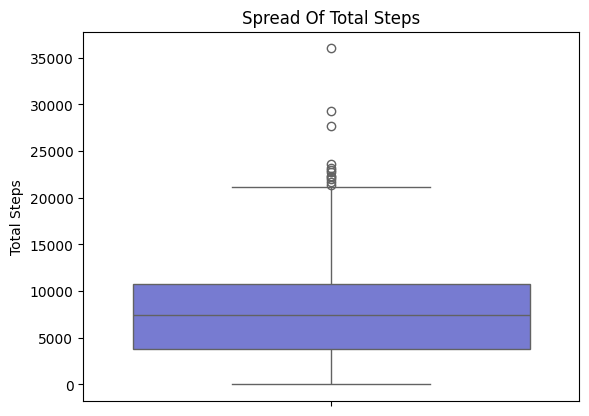

In [38]:
sns.boxplot(data=df_daily, y='TotalSteps', color='#686de0')
plt.title('Spread Of Total Steps')
plt.ylabel('Total Steps')
plt.show()

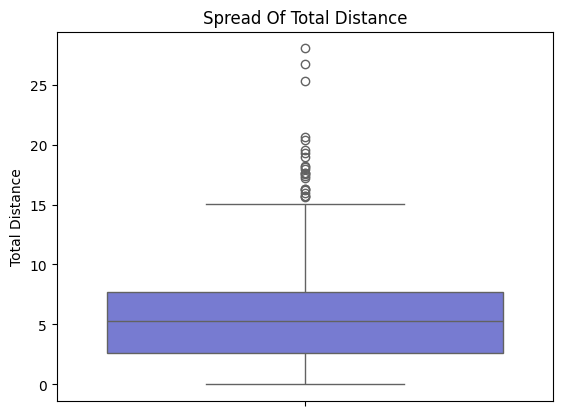

In [37]:
sns.boxplot(data=df_daily, y='TotalDistance', color='#686de0')
plt.title('Spread Of Total Distance')
plt.ylabel('Total Distance')
plt.show()

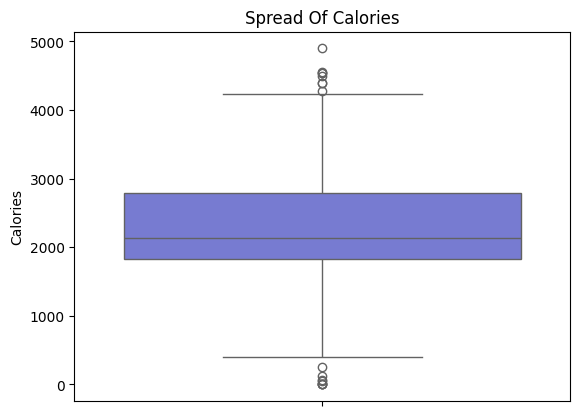

In [84]:
sns.boxplot(data=df_daily, y='Calories', color='#686de0')
plt.title('Spread Of Calories')
plt.ylabel('Calories')
plt.show()

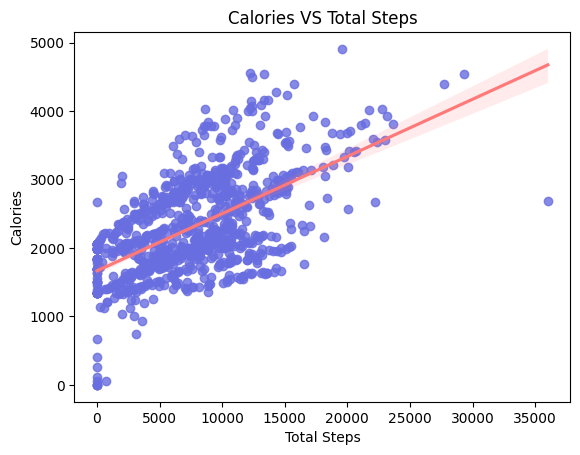

In [85]:
sns.regplot(data=df_daily, x='TotalSteps', y='Calories', line_kws={'color': '#ff7979'}, color='#686de0')
plt.title('Calories VS Total Steps')
plt.xlabel('Total Steps')
plt.ylabel('Calories')
plt.show()

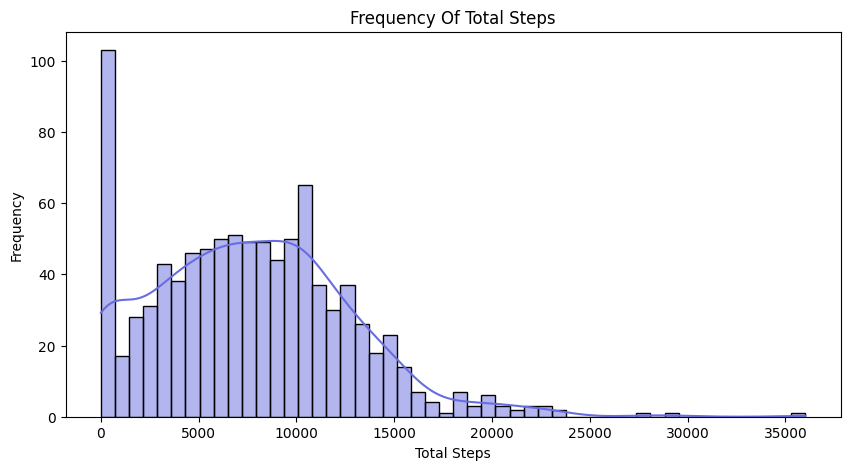

In [109]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_daily, x='TotalSteps', kde=True, bins=50, color='#686de0')
plt.title('Frequency Of Total Steps')
plt.xlabel('Total Steps')
plt.ylabel('Frequency')
plt.show()

In [40]:
df_daily.columns

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance',
       'VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance',
       'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes',
       'SedentaryMinutes', 'Calories'],
      dtype='object')

In [46]:
df_daily_sum_distance = df_daily.groupby('ActivityDate')[['VeryActiveDistance', 'ModeratelyActiveDistance', 'LightActiveDistance']].sum().reset_index()
df_daily_sum_distance

,ActivityDate,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance
0,2016-04-12,60.270000,11.42,112.530000
1,2016-04-13,43.780000,13.86,103.650000
2,2016-04-14,49.820000,16.82,117.760000
3,2016-04-15,34.840000,13.33,124.320000
4,2016-04-16,63.799999,22.68,110.420000
5,2016-04-17,36.649999,15.92,90.310000
6,2016-04-18,53.300001,22.27,105.000000
7,2016-04-19,60.260000,16.61,110.830000
8,2016-04-20,59.580000,20.27,110.430001
9,2016-04-21,61.530001,19.90,101.189999


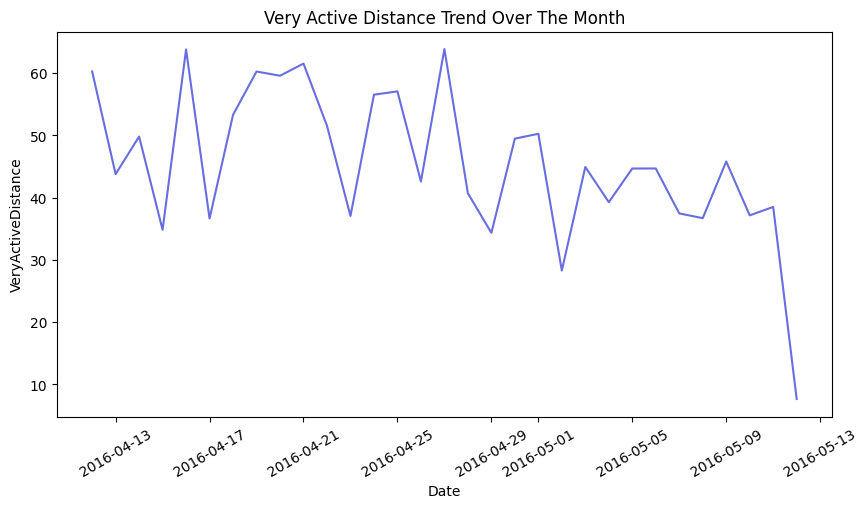

In [145]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_daily_sum_distance, x='ActivityDate', y='VeryActiveDistance', color='#686de0')
plt.title('Very Active Distance Trend Over The Month')
plt.xlabel('Date')
plt.ylabel('VeryActiveDistance')
plt.xticks(rotation=30)
plt.show()

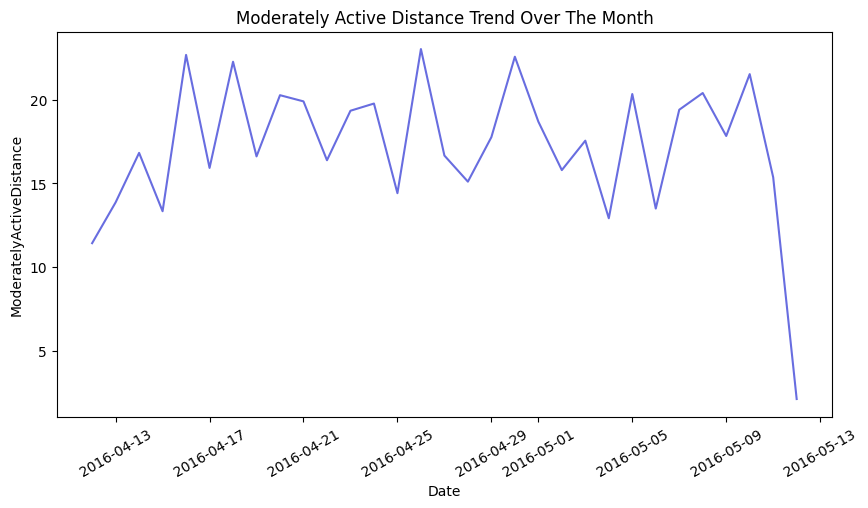

In [144]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_daily_sum_distance, x='ActivityDate', y='ModeratelyActiveDistance', color='#686de0')
plt.title('Moderately Active Distance Trend Over The Month')
plt.xlabel('Date')
plt.ylabel('ModeratelyActiveDistance')
plt.xticks(rotation=30)
plt.show()

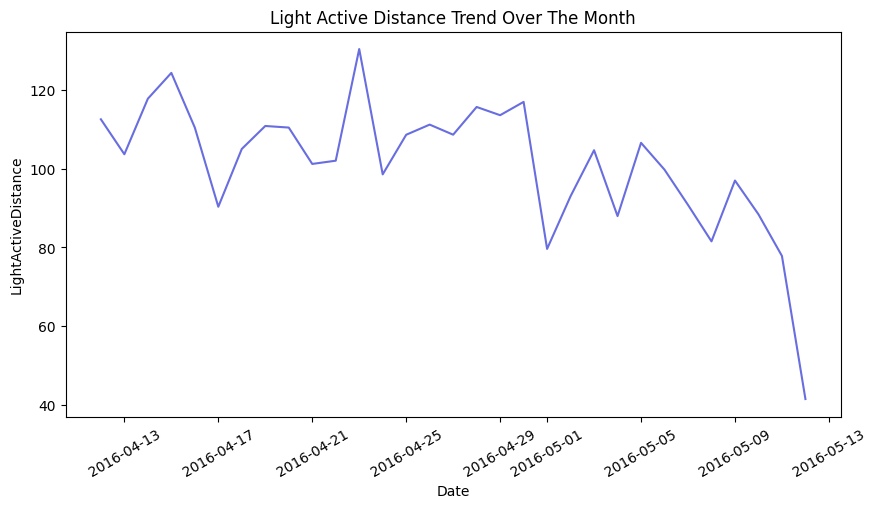

In [143]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_daily_sum_distance, x='ActivityDate', y='LightActiveDistance', color='#686de0')
plt.title('Light Active Distance Trend Over The Month')
plt.xlabel('Date')
plt.ylabel('LightActiveDistance')
plt.xticks(rotation=30)
plt.show()

## hourly_data Dataset

### Making A Feature (Extract Time)

In [113]:
df_hourly['Time'] = df_hourly['ActivityHour'].dt.time

In [115]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                22099 non-null  int64         
 1   ActivityHour      22099 non-null  datetime64[ns]
 2   Calories          22099 non-null  int64         
 3   TotalIntensity    22099 non-null  int64         
 4   AverageIntensity  22099 non-null  float64       
 5   TotalSteps        22099 non-null  int64         
 6   Time              22099 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(4), object(1)
memory usage: 1.2+ MB


In [116]:
df_hourly.head()

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,TotalSteps,Time
0,1503960366,2016-04-12 00:00:00,81,20,0.333333,373,00:00:00
1,1503960366,2016-04-12 01:00:00,61,8,0.133333,160,01:00:00
2,1503960366,2016-04-12 02:00:00,59,7,0.116667,151,02:00:00
3,1503960366,2016-04-12 03:00:00,47,0,0.000000,0,03:00:00
4,1503960366,2016-04-12 04:00:00,48,0,0.000000,0,04:00:00


In [117]:
df_hourly.Id.value_counts()

Id
1624580081    736
2873212765    736
1927972279    736
2026352035    736
2022484408    736
4558609924    736
8053475328    735
4445114986    735
2320127002    735
8877689391    735
8378563200    735
4388161847    735
7086361926    733
6962181067    732
4020332650    732
4702921684    731
1844505072    731
5553957443    730
4319703577    724
8583815059    718
1503960366    717
1644430081    708
5577150313    708
3977333714    696
8792009665    672
6290855005    665
6117666160    660
6775888955    610
7007744171    601
3372868164    472
8253242879    431
2347167796    414
4057192912     88
Name: count, dtype: int64

In [118]:
df_hourly.describe()

,Id,ActivityHour,Calories,TotalIntensity,AverageIntensity,TotalSteps
count,2.209900e+04,22099,22099.000000,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,2016-04-26 11:46:42.588352512,97.386760,12.035341,0.200589,320.166342
min,1.503960e+09,2016-04-12 00:00:00,42.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,2016-04-19 01:00:00,63.000000,0.000000,0.000000,0.000000
50%,4.445115e+09,2016-04-26 06:00:00,83.000000,3.000000,0.050000,40.000000
75%,6.962181e+09,2016-05-03 19:00:00,108.000000,16.000000,0.266667,357.000000
max,8.877689e+09,2016-05-12 15:00:00,948.000000,180.000000,3.000000,10554.000000
std,2.422500e+09,NaN,60.702622,21.133110,0.352219,690.384228


In [119]:
df_hourly_sum_data = df_hourly.groupby('ActivityHour')[['Calories', 'TotalIntensity', 'TotalSteps']].sum().reset_index()

In [120]:
df_hourly_sum_data

,ActivityHour,Calories,TotalIntensity,TotalSteps
0,2016-04-12 00:00:00,2286,47,1272
1,2016-04-12 01:00:00,2242,21,314
2,2016-04-12 02:00:00,2258,27,441
3,2016-04-12 03:00:00,2221,13,225
4,2016-04-12 04:00:00,2237,13,316
...,...,...,...,...
731,2016-05-12 11:00:00,1555,210,5859
732,2016-05-12 12:00:00,1540,276,7921
733,2016-05-12 13:00:00,1282,196,5722
734,2016-05-12 14:00:00,1617,306,11411


In [132]:
df_hourly_sum_time = df_hourly.groupby('Time')[['Calories', 'TotalIntensity', 'TotalSteps']].sum().reset_index()
df_hourly_sum_time['Time'] = df_hourly_sum_time.Time.astype('str')
df_hourly_sum_time

,Time,Calories,TotalIntensity,TotalSteps
0,00:00:00,67066,1989,39404
1,01:00:00,65464,1324,21555
2,02:00:00,64551,974,15964
3,03:00:00,63013,414,5996
4,04:00:00,63620,590,11836
5,05:00:00,76152,4614,40886
6,06:00:00,80994,7235,166191
7,07:00:00,87959,9993,284932
8,08:00:00,96207,13656,398044
9,09:00:00,98819,14326,403404


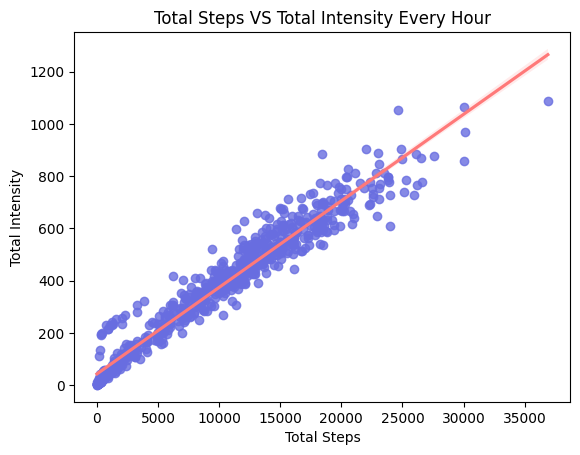

In [121]:
sns.regplot(data=df_hourly_sum_data, x='TotalSteps', y='TotalIntensity', line_kws={'color': '#ff7979'}, color='#686de0')
plt.title('Total Steps VS Total Intensity Every Hour')
plt.xlabel('Total Steps')
plt.ylabel('Total Intensity')
plt.show()

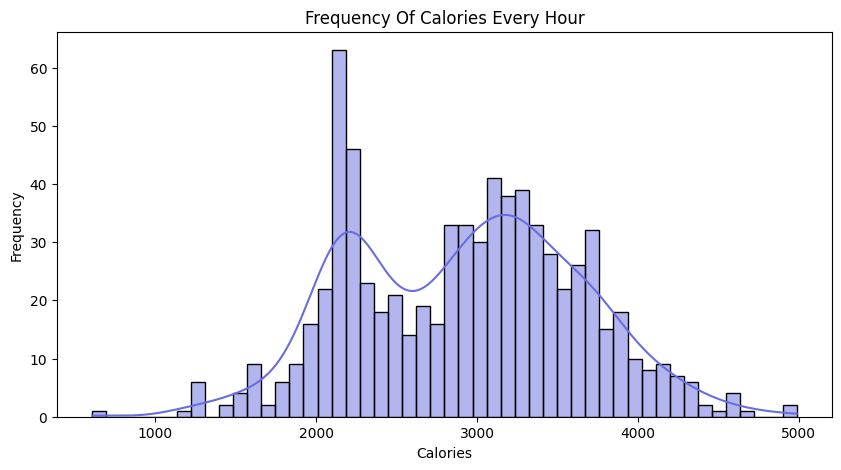

In [122]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df_hourly_sum_data, x='Calories', kde=True, bins=50, color='#686de0')
plt.title('Frequency Of Calories Every Hour')
plt.xlabel('Calories')
plt.ylabel('Frequency')
plt.show()

In [126]:
df_hourly_sum_time.columns

Index(['Time', 'Calories', 'TotalIntensity', 'TotalSteps'], dtype='object')

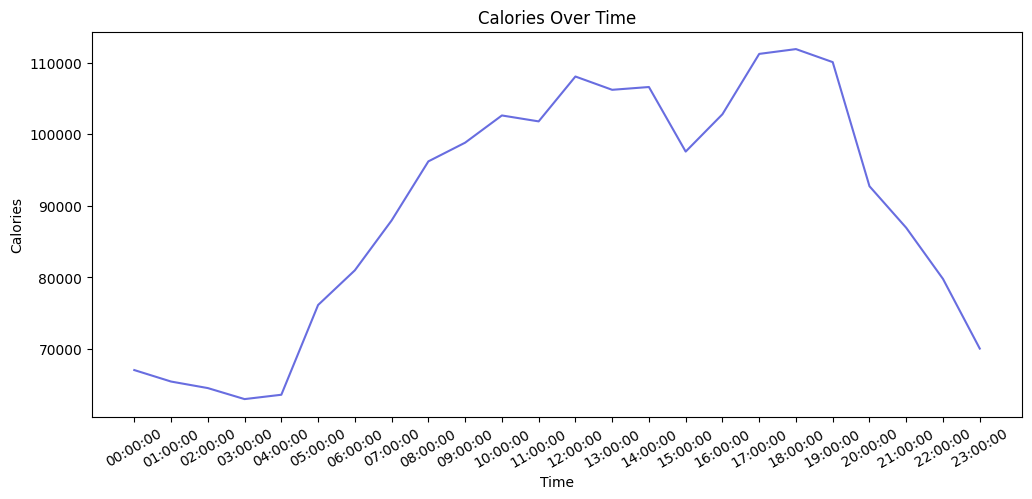

In [142]:
plt.figure(figsize=(12, 5))
sns.lineplot(data=df_hourly_sum_time, x='Time', y='Calories', color='#686de0')
plt.title('Calories Over Time')
plt.xlabel('Time')
plt.ylabel('Calories')
plt.xticks(rotation=30)
plt.show()

## sleep_day Dataset

In [123]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Id                      413 non-null    int64         
 1   SleepDay                413 non-null    datetime64[ns]
 2   TotalSleepRecords       413 non-null    int64         
 3   TotalMinutesAsleep      413 non-null    int64         
 4   TotalTimeInBed          413 non-null    int64         
 5   TotalMinutesAwakeInBed  413 non-null    int64         
dtypes: datetime64[ns](1), int64(5)
memory usage: 19.5 KB


In [136]:
df_sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalMinutesAwakeInBed
0,1503960366,2016-04-12,1,327,346,19
1,1503960366,2016-04-13,2,384,407,23
2,1503960366,2016-04-15,1,412,442,30
3,1503960366,2016-04-16,2,340,367,27
4,1503960366,2016-04-17,1,700,712,12


In [137]:
df_sleep.Id.value_counts()

Id
8378563200    32
5553957443    31
6962181067    31
3977333714    28
4445114986    28
2026352035    28
4702921684    28
4319703577    26
5577150313    26
1503960366    25
7086361926    24
4388161847    24
6117666160    18
2347167796    15
8792009665    15
4020332650     8
4558609924     5
1927972279     5
1644430081     4
1844505072     3
8053475328     3
6775888955     3
7007744171     2
2320127002     1
Name: count, dtype: int64

In [138]:
df_sleep.columns

Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'TotalMinutesAwakeInBed'],
      dtype='object')

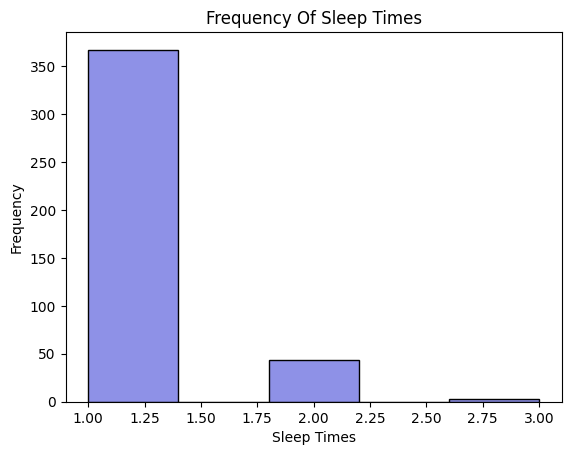

In [141]:
sns.histplot(data=df_sleep, x='TotalSleepRecords', bins=5, color='#686de0')
plt.title('Frequency Of Sleep Times')
plt.xlabel('Sleep Times')
plt.ylabel('Frequency')
plt.show()

In [148]:
df_sleep_sum_min = df_sleep.groupby('SleepDay')['TotalMinutesAsleep'].sum().reset_index()
df_sleep_sum_min

,SleepDay,TotalMinutesAsleep
0,2016-04-12,5745
1,2016-04-13,6026
2,2016-04-14,5788
3,2016-04-15,7267
4,2016-04-16,5484
5,2016-04-17,5569
6,2016-04-18,4199
7,2016-04-19,5727
8,2016-04-20,6694
9,2016-04-21,5640


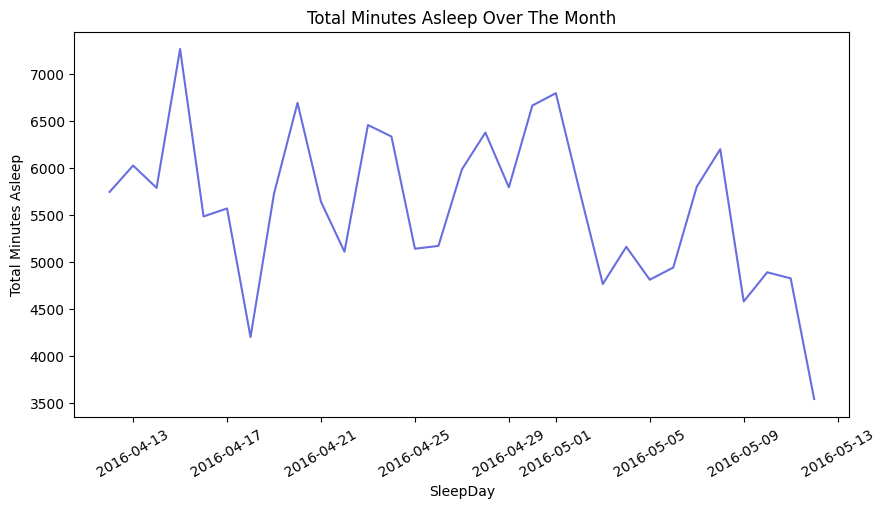

In [152]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_sleep_sum_min, x='SleepDay', y='TotalMinutesAsleep', color='#686de0')
plt.title('Total Minutes Asleep Over The Month')
plt.ylabel('Total Minutes Asleep')
plt.xticks(rotation=30)
plt.show()